In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
path = os.path.abspath('..')
if not path in sys.path:
    sys.path.append(path)
%matplotlib inline

In [10]:
x = np.random.rand(100) * 3
y = np.sin(x)

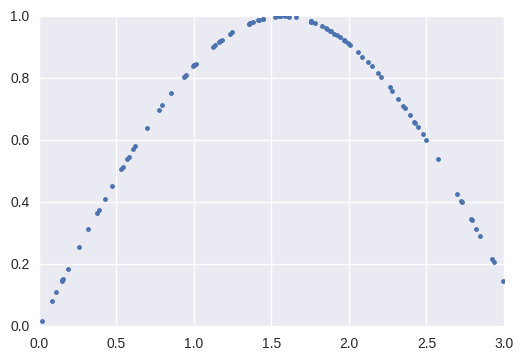

In [11]:
plt.plot(x, y, '.')

In [143]:
x = np.loadtxt('x.np')
y = np.loadtxt('y.np')

In [174]:
def active(x):
    return 1 / (1 + np.exp(-x))

def _active(x):
    return active(x) * (1 - active(x))

def initNetwork(nns):
    w = [np.random.rand(nns[i] + 1, nns[i + 1]) for i in range(len(nns) - 1)]
    return w

def forward(x, weight, act):
    res = x.copy()
    out = [np.append(res, 1)]
    for (index, w) in enumerate(weight):
        o = np.dot(np.append(res, 1), w)
        res = act[index](o)
        out.append(np.append(res, 1))
    return res, out

def backward(x, y, act, _act, w, lr=0.1, miu=0.8):
    (z, out) = forward(x, w, act)
    print 'x = {0}, y = {1}, out = {2}, loss = {3}'.format(x, y, z, .5 * (y - z) ** 2) 
    print 'out =', out
    res = y - z
    delta = res
    for i in range(len(w) - 1, -1, -1):  
        print w
        print 'delta =', delta
        print 'aaa', _act[i](out[i][:-1]) * delta
        w[i] = miu * w[i] + (1 - miu)  * lr * np.multiply(out[i].reshape(out[i].size, 1), _act[i](out[i][:-1]) * delta) 
        print w[i], delta
        delta = np.dot(w[i], delta)[:-1]
    return (y - z) ** 2 / 2

act = [active, lambda x : x]
_act = [_active, lambda x : np.ones_like(x)]
#w = initNetwork([1, 2, 1])

w = [np.array([[0.1, 0.2],[0.2, 0.1]]), 
     np.array([[ 0.1 ],
                [ 0.3],
                [ 0.3]])]

for i in range(100):
    loss = 0;
    loss += backward(np.array([x[i]]), np.array([y[i]]), act, _act, w)
    print w
    break    
    print loss
    print '----------------------'
#print w
test = np.linspace(0, 4)
pred = np.array([forward(test[i], w, act)[0] for i in range(test.size)])
plt.plot(test, pred.reshape(pred.shape[0]), '.')
plt.plot(x, y, 'r.')

x = [ 2.78802874], y = [ 0.34624346], out = [ 0.55936322], loss = [ 0.02271002]
out = [array([ 2.78802874,  1.        ]), array([ 0.61746515,  0.65872235,  1.        ]), array([ 0.55936322,  1.        ])]
[array([[ 0.1,  0.2],
       [ 0.2,  0.1]]), array([[ 0.1],
       [ 0.3],
       [ 0.3]])]
delta = [-0.21311976]
aaa [-0.21311976 -0.21311976]
[[ 0.07736812  0.07736812]
 [ 0.23719227  0.23719227]
 [ 0.2357376   0.2357376 ]] [-0.21311976]


ValueError: shapes (3,2) and (1,) not aligned: 2 (dim 1) != 1 (dim 0)

In [154]:
for i in range(len(w) - 1, -1, -1): 
    print i

1
0


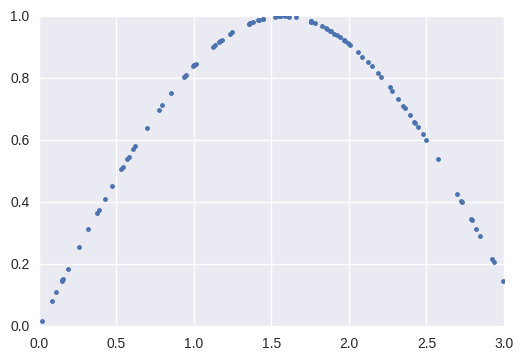

In [114]:
plt.plot(x, y, '.')

In [141]:
np.savetxt('x.np', x)
np.savetxt('y.np', y)